Наивный байесовский :классификатор (Na!ve Bayes classifier) - это простой
классификатор, основанный на использовании теоремы Байеса, которая
описывает вероятность собьпия с учетом связанных с ним условий. Такой
классификатор создается посредством присваивания меток классов экземплярам
задачи. Последние представляются в виде векторов значений признаков.
При этом предполаrается, что значение любого заданного признака не
зависит от значений друrих признаков. Эго предположение о независимости
рассматриваемых признаков и составляет наивную часть байесовского классификатора.

Мы можем оценивать влияние любого признака переменной класса независимо
от влияния друrих признаков. Например, мы можем считать животное
гепардом, если оно имеет пятнистую кожу, четыре лапы и хвост и
развивает скорость, равную примерно 70 миль в час. В случае использования
наивного байесовского классификатора считается, что каждый из признаков
вносит независимый вклад в конечный результат, оценивающий вероятность
того, что животное является гепардом. Мы не будем утруждать себя рассмотрением
корреляции между рисунком кожи, количеством лап, наличием
хвоста и скоростью перемещения.

In [105]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from Utilites import visualize_classifier

In [106]:
input_file = 'data_multivar_nb.txt'

In [107]:
data=np.loadtxt(input_file, delimiter=',')
X,y=data[:,:-1],data[:,-1]

FileNotFoundError: data_multivar_nb.txt not found.

In [108]:
X

array([[ 2.180e+00,  5.700e-01],
       [ 4.130e+00,  5.120e+00],
       [ 9.870e+00,  1.950e+00],
       [ 4.020e+00, -8.000e-01],
       [ 1.180e+00,  1.030e+00],
       [ 4.590e+00,  5.740e+00],
       [ 8.250e+00,  1.300e+00],
       [ 3.910e+00, -6.800e-01],
       [ 5.500e-01,  1.260e+00],
       [ 5.640e+00,  6.670e+00],
       [ 9.220e+00,  1.460e+00],
       [ 4.360e+00, -1.270e+00],
       [ 2.190e+00,  2.660e+00],
       [ 4.360e+00,  4.860e+00],
       [ 7.400e+00,  4.440e+00],
       [ 3.890e+00,  1.400e-01],
       [ 1.670e+00,  8.100e-01],
       [ 4.970e+00,  5.670e+00],
       [ 8.520e+00,  2.130e+00],
       [ 5.240e+00, -7.600e-01],
       [ 1.060e+00,  2.070e+00],
       [ 5.690e+00,  6.080e+00],
       [ 9.520e+00,  2.980e+00],
       [ 4.730e+00, -1.710e+00],
       [ 1.640e+00,  9.600e-01],
       [ 5.550e+00,  5.680e+00],
       [ 8.100e+00,  4.260e+00],
       [ 3.820e+00, -1.230e+00],
       [ 1.090e+00,  1.400e+00],
       [ 4.830e+00,  6.160e+00],
       [ 7

In [109]:
y

array([0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1.,
       2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2.,
       3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.,
       0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1.,
       2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2.,
       3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.,
       0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1.,
       2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2.,
       3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.,
       0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1.

In [110]:
# Создание наивного байесовского классификатора
classifier = GaussianNB()

In [111]:
# Тренировка классификатора
classifier.fit(X, y)

GaussianNB()

In [112]:
#Прогнозирование значений дпя тренировочных данных
y_pred = classifier.predict(X)

Accuracy of Naive Bayes classifier = 99.75 %


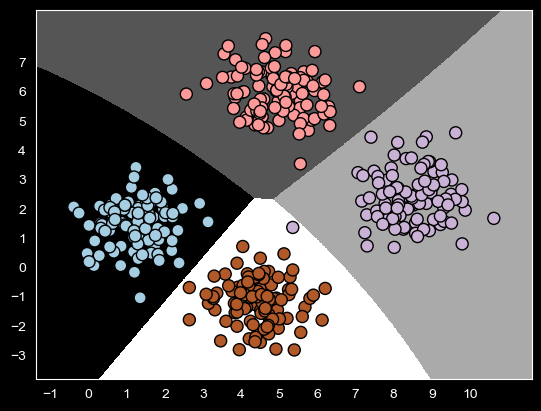

In [113]:
# Вычисление качества классификатора
accuracy = 100.0 * (y== y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")
# Визуализация результатов работы классификатора
visualize_classifier(classifier, X, y)

Предыдущий метод вычисления качества классификатора не является надежным.
Нам нужно выполнить перекрестную проверку, чтобы не использовать
те же самые тренировочные данные при тестировании.

Разобьем данные на обучающий и тестовый наборы. В соответствии со
значением параметра test_size, указанным в строке кода ниже, мы отнесем
80% данных к тренировке, а оставшиеся 20% - к тестированию. Затем мы выполним
тренировку наивною байесовскою классификатора на этих данных.

In [114]:
# Разбивка данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred=classifier_new.predict(X_test)

Accuracy of the new classifier = 100.0 %


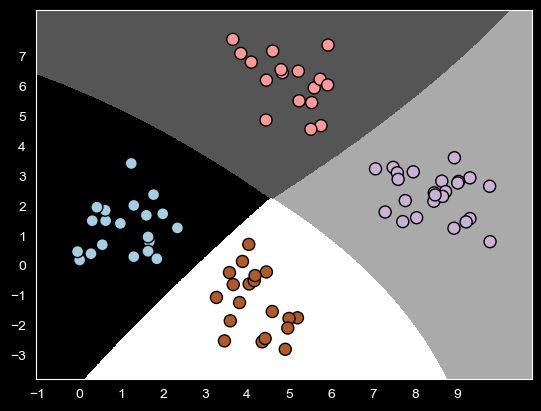

In [115]:
# Вычисление качества классификатора
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")
# Визуализация работы классификатора
visualize_classifier(classifier_new, X_test, y_test)

Воспользуемся встроенными функциями для вычисления качества (accuracy),
точности (precision) и полноты (recall) классификатора на основании
тройной перекрестной проверки.

In [117]:
num_folds = 3
accuracy_values = cross_val_score(classifier,X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: "+ str(round(100*accuracy_values.mean(),2)) + "%")
precision_values = cross_val_score(classifier,X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: "+ str(round(100*precision_values.mean(),2)) + "%")
recall_values = cross_val_score(classifier,X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: "+ str(round(100*recall_values.mean(),2)) + "%")
f1_values = cross_val_score(classifier,X, y, scoring='f1_weighted', cv=num_folds)
print("F1: "+ str(round(100*f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


In [118]:
X_new=np.array([[8.8,2.1]])

In [119]:
y_new_pred=classifier_new.predict(X_new)
print(y_new_pred[0])

2.0
